# **WK8 Exploratory Data Analysis**

Name: **Andrei Kyo D. Medel** <br>
Course: **BSCpE2A**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Display **DataFrame**

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\skool\Skool Works\MATHEDA Medel\Medel Week 8\Raw/chip-dataset-cleaned(1).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


Drop unusuable **columns**

In [4]:
df = df.drop(df.columns[[10,11,12]],axis=1)

View **Dataset**

In [5]:
display(df.head())

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


Detailed information of Dataset

In [6]:
display(df.describe())

,Process_Size,TDP,Die_Size,Transistors,Frequency
count,4845.000000,4854.000000,4854.000000,4854.000000,4854.000000
mean,55.109598,81.359981,188.440445,1929.922279,1484.406057
std,44.998676,71.683029,116.523337,3736.859205,1066.701523
min,0.000000,1.000000,1.000000,8.000000,100.000000
25%,22.000000,35.000000,112.000000,180.000000,590.000000
50%,40.000000,67.000000,177.000000,950.000000,1073.500000
75%,90.000000,95.000000,221.000000,1929.922279,2400.000000
max,250.000000,900.000000,826.000000,54200.000000,4700.000000


## Manufacturing Details

### Number of Chips Manufactured

Create Copy of Dataset and Display count for each *Vendor*

In [7]:
df_w = df.copy()
chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

Create Bar Graph for **Chips manufactured** per *Vendor*

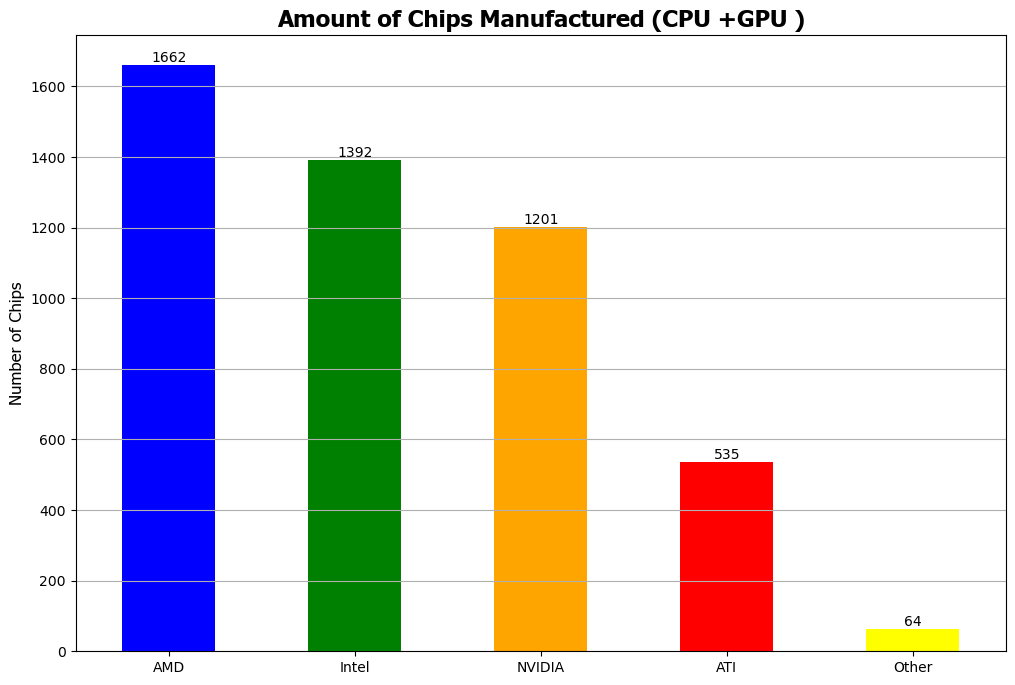

In [8]:
chart = chip_count.plot(kind='bar',
                        color = ['BLUE','GREEN','ORANGE','RED','YELLOW'],
                        figsize=(12,8))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Amount of Chips Manufactured (CPU +GPU )',
          fontfamily = 'tahoma',
          fontsize=17,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index,rotation = 0)
plt.ylabel('Number of Chips',fontfamily='tahoma',fontsize=12)
plt.grid(axis='y', linestyle ='-', alpha=1)
plt.show()

### Number of CPUs Manufactured

Processes remain similar but data used instead would be for CPUs 

In [9]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [10]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

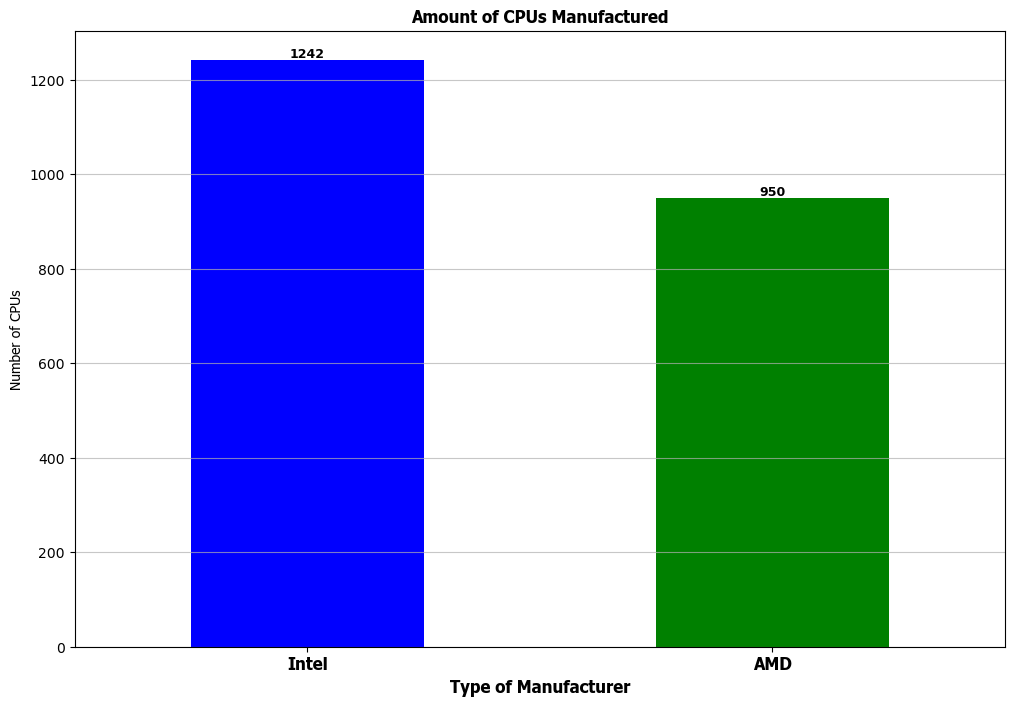

In [11]:
 
fig, ax = plt.subplots(figsize=(12, 8))
chart = cpu_count.plot(kind='bar',
                       color = ['BLUE','GREEN','ORANGE','RED','YELLOW'])

chart.bar_label(chart.containers[0], 
                label_type='edge', 
                fontsize=9, color='black', 
                weight='bold')

plt.title('Amount of CPUs Manufactured', fontfamily='Tahoma', 
          fontsize=12, 
          fontweight='bold', )

plt.xlabel('')
plt.xticks(rotation=0, 
           fontsize=12, 
           fontfamily='Tahoma',
           fontweight='bold' 
           )

plt.ylabel('Number of CPUs', 
           fontsize=10, 
           fontfamily='Tahoma',
           )
plt.grid(axis='y', linestyle='-', alpha=0.7)


plt.xlabel('Type of Manufacturer',
            fontfamily = 'Tahoma',
            fontsize = 12,
            fontweight = 'bold')

plt.show()

### Number of GPUs Manufactured

In [12]:
df_gpu = df_w[df_w['Type']=='GPU']
df_gpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
2192,Intel Xeon E3-1275,GPU,4/3/2011,32.0,95.000000,216.000000,1160.000000,100,Intel,Intel
2193,Matrox Parhelia 128 MB,GPU,6/25/2002,150.0,81.359981,174.000000,80.000000,200,UMC,Other
2194,NVIDIA GeForce MX150 GP107,GPU,2/23/2019,14.0,25.000000,132.000000,3300.000000,1469,Samsung,NVIDIA
2195,Intel GMA 500,GPU,3/2/2008,130.0,81.359981,188.440445,1929.922279,200,Intel,Intel
2196,ATI Radeon HD 4350 AGP,GPU,9/30/2008,55.0,20.000000,73.000000,242.000000,600,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,6/1/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,3/3/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,3/6/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA


In [13]:
gpu_count = df_gpu['Vendor'].value_counts()
gpu_count

Vendor
NVIDIA    1201
AMD        712
ATI        535
Intel      150
Other       64
Name: count, dtype: int64

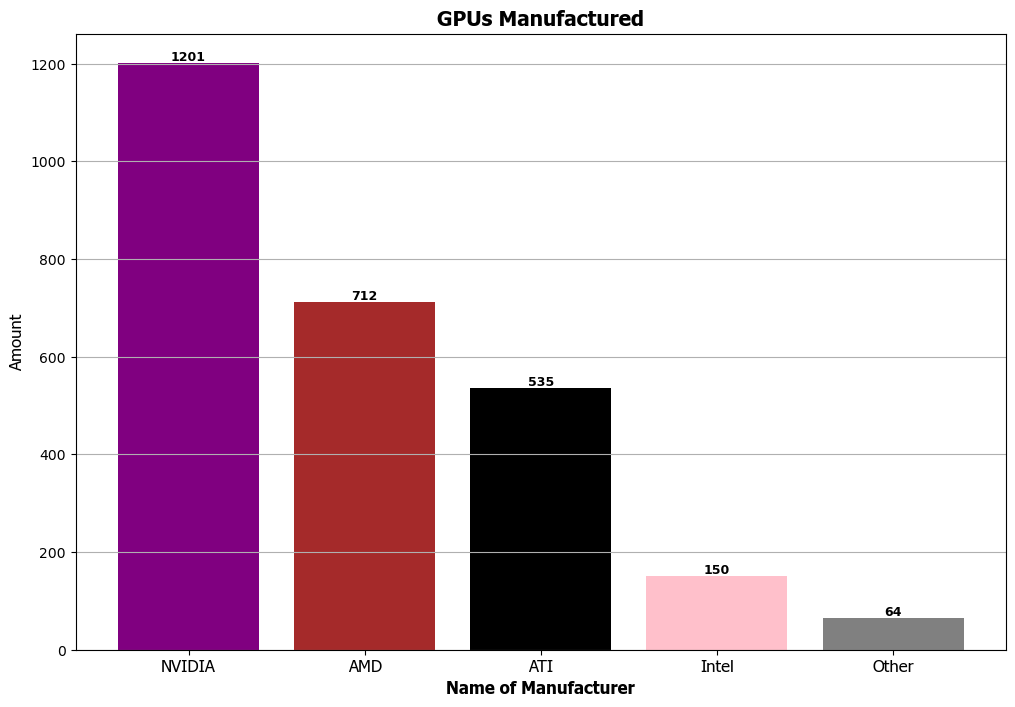

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
bars = ax.bar(gpu_count.index,  
              gpu_count.values,  
              color=['PURPLE', 'BROWN', 'BLACK', 'PINK', 'GRAY'])

plt.bar_label(bars, fontsize=9, color='black', weight='bold')  

plt.title('GPUs Manufactured',
          fontfamily='tahoma',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Amount', fontsize=12, fontfamily='tahoma')
plt.xlabel('')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.xticks(rotation=0, ha='center', fontsize=12, fontfamily='tahoma')


plt.xlabel('Name of Manufacturer',
            fontfamily = 'Tahoma',
            fontsize = 12,
            fontweight = 'bold')

plt.show()

## Thermal Design Power

### CPUs with the Lowest TDP (Thermal Design Power) 

In [15]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [16]:
df_tdp = df_tdp.sort_values(by='TDP')
df_tdp

,Product,TDP
60,Intel Atom Z515,1.0
1964,Intel Atom Z600,1.0
1550,Intel Atom Z500,1.0
469,Intel Atom Z620,1.0
2175,Intel Atom Z612,1.0
...,...,...
4735,NVIDIA Quadro Plex 2200 D2,640.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0


In [17]:
df_tdp = df_tdp.head(10)
df_tdp

,Product,TDP
60,Intel Atom Z515,1.0
1964,Intel Atom Z600,1.0
1550,Intel Atom Z500,1.0
469,Intel Atom Z620,1.0
2175,Intel Atom Z612,1.0
1761,Intel Atom Z610,1.0
3101,NVIDIA GeForce2 Go,2.0
2162,Intel Atom Z3740,2.0
1977,Intel Atom Z520PT,2.0
858,Intel Atom Z540,2.0


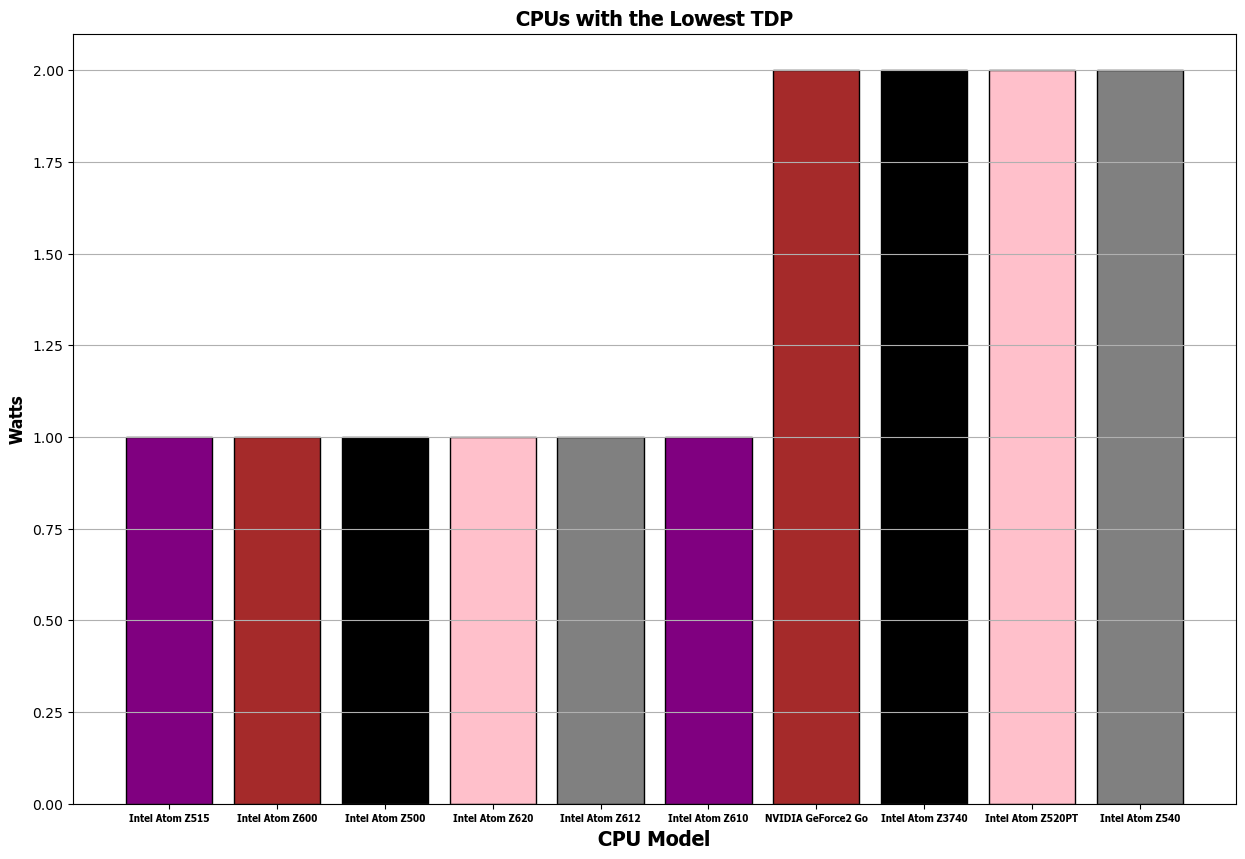

In [18]:
plt.figure(figsize=(15, 10))
plt.bar(df_tdp['Product'], df_tdp['TDP'], color=['PURPLE', 'BROWN', 'BLACK', 'PINK', 'GRAY'], edgecolor='black')

plt.title('CPUs with the Lowest TDP',fontfamily = 'Tahoma', fontsize=15, fontweight='bold')
plt.ylabel('Watts', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xticks(rotation=0, ha='center', fontsize=7, fontfamily='Tahoma', fontweight='bold')

plt.grid(axis='y', linestyle='-', alpha=1)


plt.xlabel('CPU Model',
            fontfamily = 'Tahoma',
            fontsize = 15,
            fontweight = 'bold')
plt.show()

### GPUs with the Lowest TDP

In [19]:
df_tdpg = df_w[df_w['Type'] == 'GPU'][['Product', 'TDP']]

In [20]:
df_tdpg = df_tdpg.sort_values(by='TDP')

In [21]:
df_tdpg = df_tdpg.head(7)

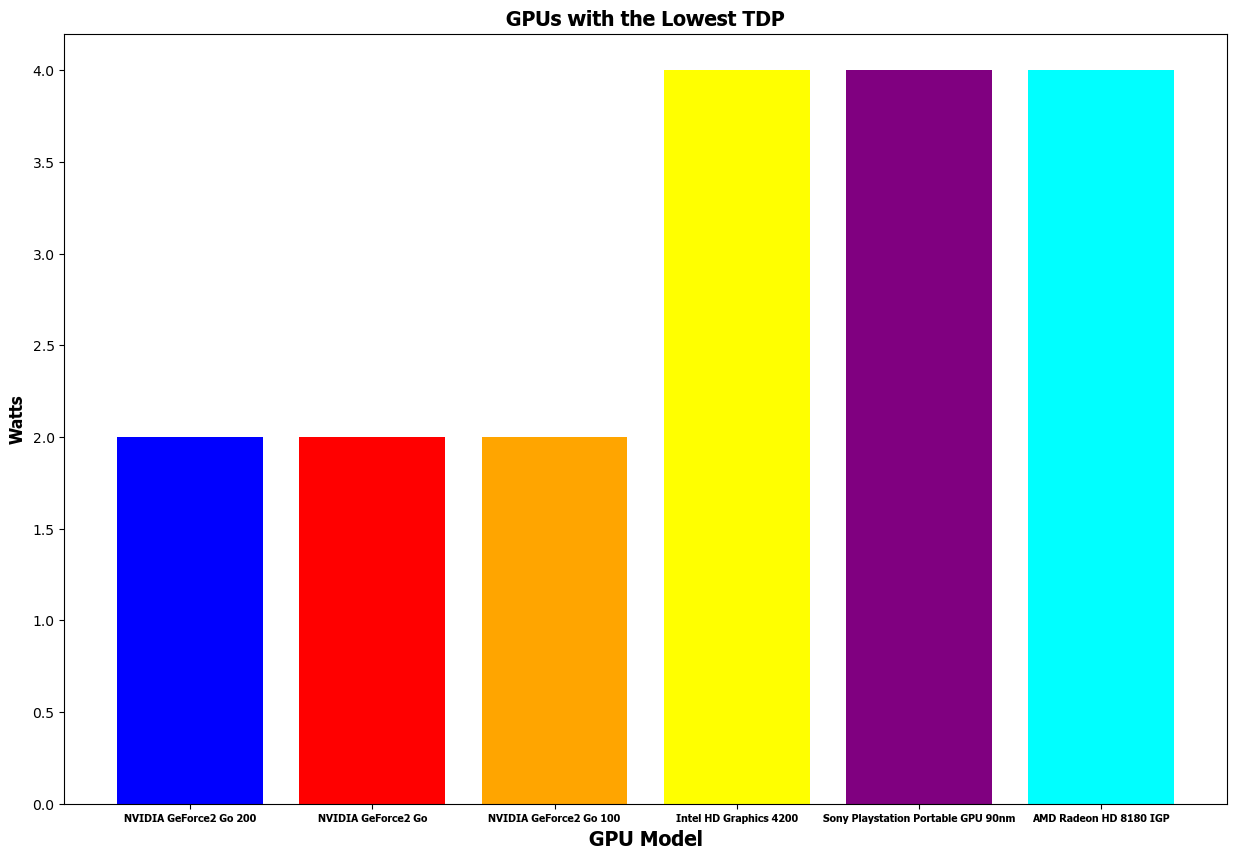

In [22]:
plt.figure(figsize=(15, 10))
plt.bar(df_tdpg['Product'], df_tdpg['TDP'], color = ['BLUE','GREEN','ORANGE','RED','YELLOW', 'PURPLE', 'CYAN'])

plt.title('GPUs with the Lowest TDP', fontsize=15 , fontweight='bold', fontfamily='Tahoma')

plt.ylabel('Watts', fontsize=12, fontfamily='Tahoma', fontweight='bold')

plt.xticks(rotation=0, ha='center', fontsize=7.5, fontfamily='Tahoma', fontweight='bold' )


plt.xlabel('GPU Model',
            fontfamily = 'Tahoma',
            fontsize = 15,
            fontweight = 'bold')

plt.grid(axis='y', linestyle='', alpha=1)

plt.show()

### CPUs with the Highest TDP

In [23]:
df_tdp_cpu_high = df_w[df_w['Type'] == 'CPU'][['Product', 'TDP']]
df_tdp_cpu_high = df_tdp_cpu_high.sort_values(by='TDP', ascending=False)
df_tdp_cpu_high = df_tdp_cpu_high.head(6)

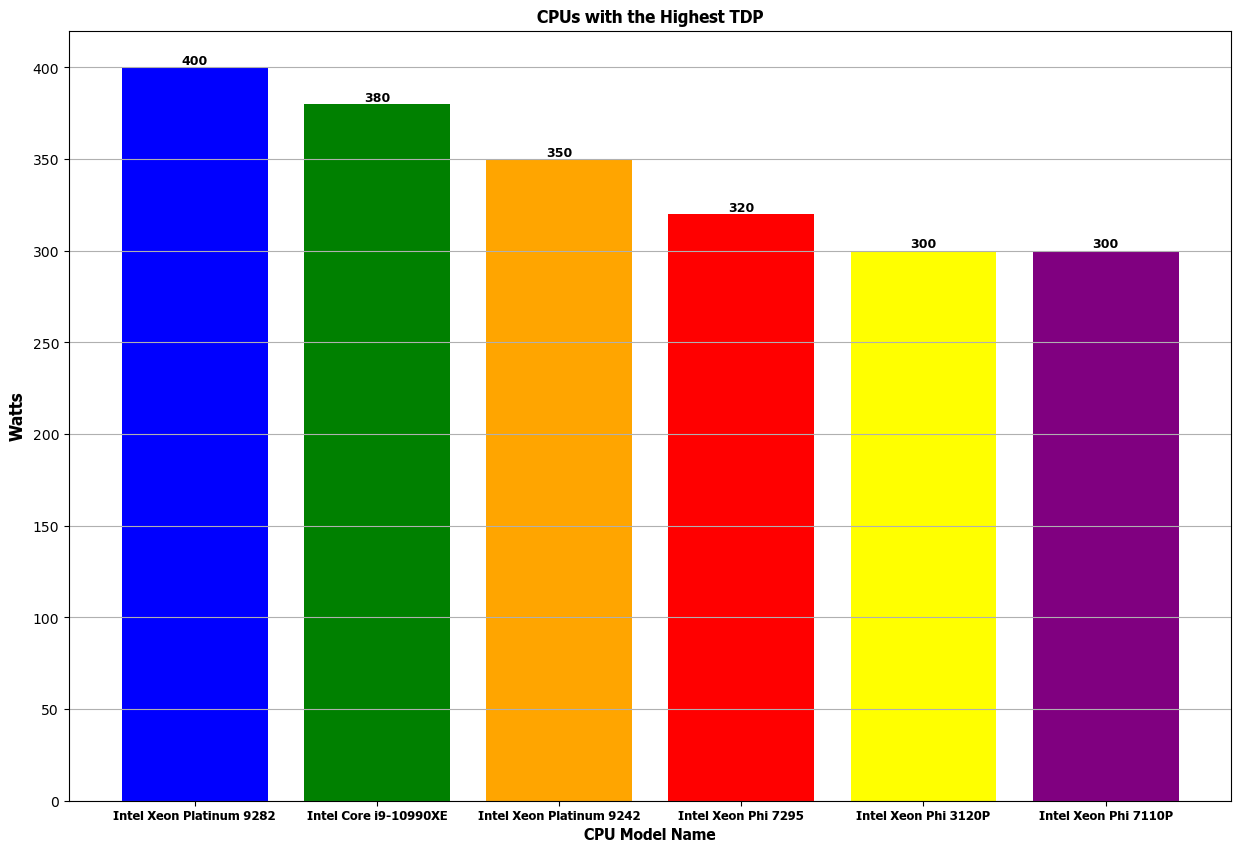

In [24]:
plt.figure(figsize=(15,10))
bars = plt.bar(df_tdp_cpu_high['Product'],
               df_tdp_cpu_high['TDP'],
               color=['BLUE','GREEN','ORANGE','RED','YELLOW', 'PURPLE', 'CYAN', 'MAGENTA', 'BROWN', 'BLACK'])

plt.bar_label(bars, label_type='edge', fontsize=9, color='black', weight='bold')   

plt.title('CPUs with the Highest TDP', 
          fontfamily='Tahoma',
          fontsize=12,
          fontweight='bold')

plt.ylabel('Watts', fontsize=12, fontfamily='Tahoma' , fontweight='bold')

plt.xticks(rotation=0, ha='center', fontsize=9, fontfamily='Tahoma', fontweight='bold')

plt.grid(axis='y', linestyle='-', alpha=1)

plt.xlabel('CPU Model Name',
            fontfamily = 'Tahoma',
            fontsize = 11,
            fontweight = 'bold')

plt.show()

### GPUs with the highest TDP

In [25]:
df_tdp_gpu_high = df_w[df_w['Type'] == 'GPU'][['Product', 'TDP']]
df_tdp_gpu_high = df_tdp_gpu_high.sort_values(by='TDP', ascending=False)
df_tdp_gpu_high = df_tdp_gpu_high.head(7)
df_tdp_gpu_high

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
2908,NVIDIA Tesla S1075,800.0
2522,NVIDIA Quadro Plex 2100 D4,640.0
4420,NVIDIA Quadro Plex 1000 Model II,640.0
4605,NVIDIA Quadro Plex 2100 S4,640.0


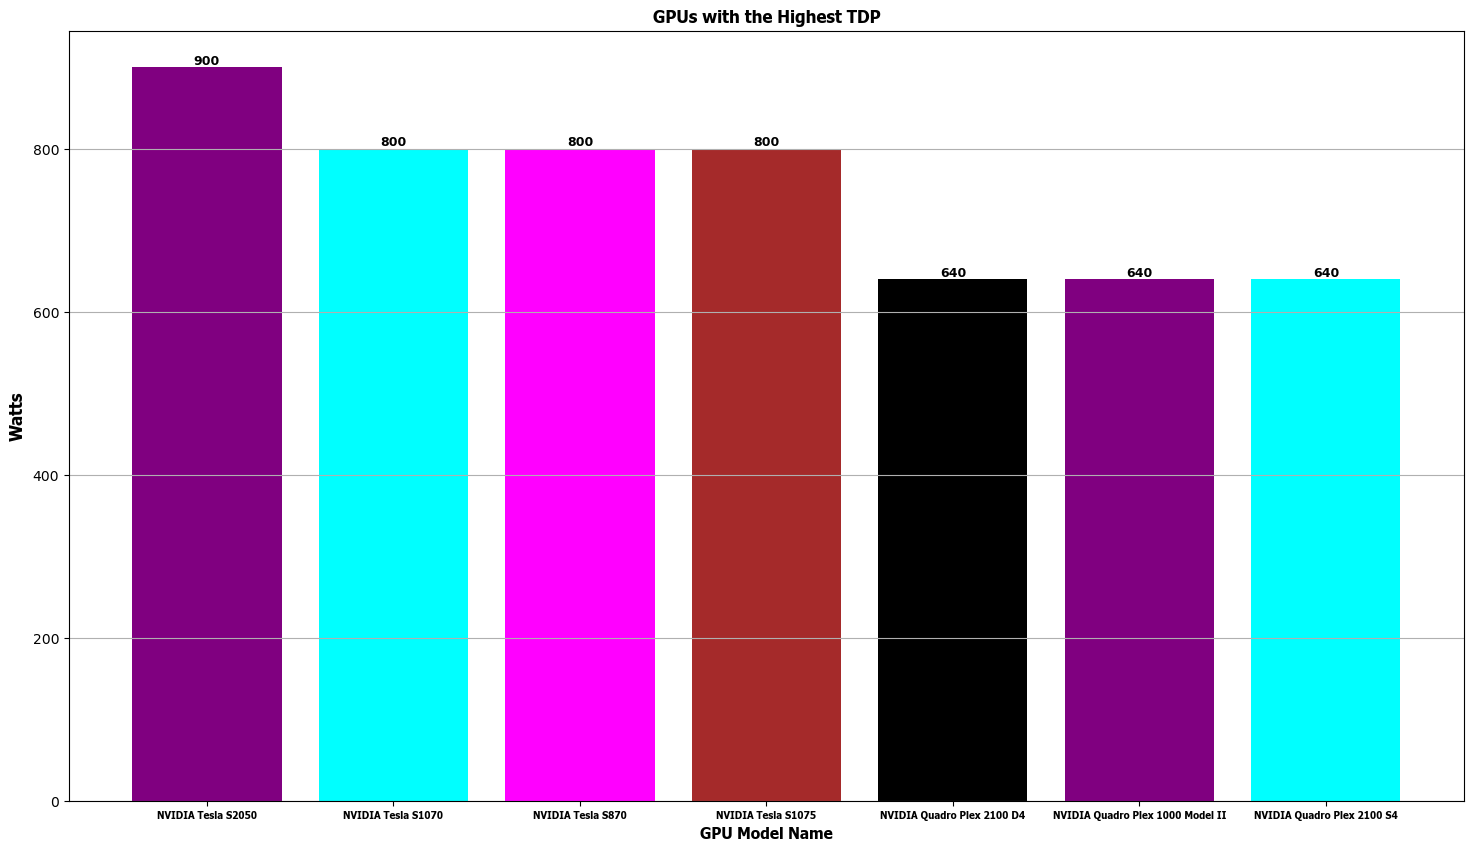

In [26]:
plt.figure(figsize=(18,10))
bars = plt.bar(df_tdp_gpu_high['Product'],
               df_tdp_gpu_high['TDP'],
               color=['PURPLE', 'CYAN', 'MAGENTA', 'BROWN', 'BLACK'])

plt.bar_label(bars, label_type='edge', fontsize=9, color='black', weight='bold')   

plt.title('GPUs with the Highest TDP', 
          fontfamily='Tahoma',
          fontsize=12,
          fontweight='bold')

plt.ylabel('Watts', fontsize=12, fontfamily='Tahoma' , fontweight='bold')

plt.xticks(rotation=0, ha='center', fontsize=7, fontfamily='Tahoma', fontweight='bold')

plt.grid(axis='y', linestyle='-', alpha=1)

plt.xlabel('GPU Model Name',
            fontfamily = 'Tahoma',
            fontsize = 11,
            fontweight = 'bold')

plt.show()

## Specification Trends

### CPU Trends

#### CPU TDP Trend

In [27]:
df_trend_cpu_TDP = df_w[['Type','Date','TDP']].where(df_w['Type']=='CPU').dropna()
df_trend_cpu_TDP

,Type,Date,TDP
0,CPU,2/20/2007,45.0
1,CPU,9/6/2018,35.0
2,CPU,9/2/2020,28.0
3,CPU,9/1/2013,80.0
4,CPU,5/3/2011,125.0
...,...,...,...
2187,CPU,4/6/2021,185.0
2188,CPU,3/16/2020,54.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,85.0


In [28]:
df_trend_cpu_TDP['Date'] = pd.to_datetime(df_trend_cpu_TDP['Date'])
df_trend_cpu_TDP['Year'] = df_trend_cpu_TDP['Date'].dt.year
df_trend_cpu_TDP 

,Type,Date,TDP,Year
0,CPU,2007-02-20,45.0,2007.0
1,CPU,2018-09-06,35.0,2018.0
2,CPU,2020-09-02,28.0,2020.0
3,CPU,2013-09-01,80.0,2013.0
4,CPU,2011-05-03,125.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,185.0,2021.0
2188,CPU,2020-03-16,54.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,85.0,2004.0


In [29]:
df_trend_cpu_TDP = df_trend_cpu_TDP.groupby('Year')['TDP'].mean().reset_index()
df_trend_cpu_TDP

,Year,TDP
0,2000.0,50.470588
1,2001.0,59.186047
2,2002.0,68.487179
3,2003.0,73.630137
4,2004.0,78.250000
5,2005.0,79.525974
6,2006.0,72.822222
7,2007.0,56.608696
8,2008.0,63.589286
9,2009.0,74.426087


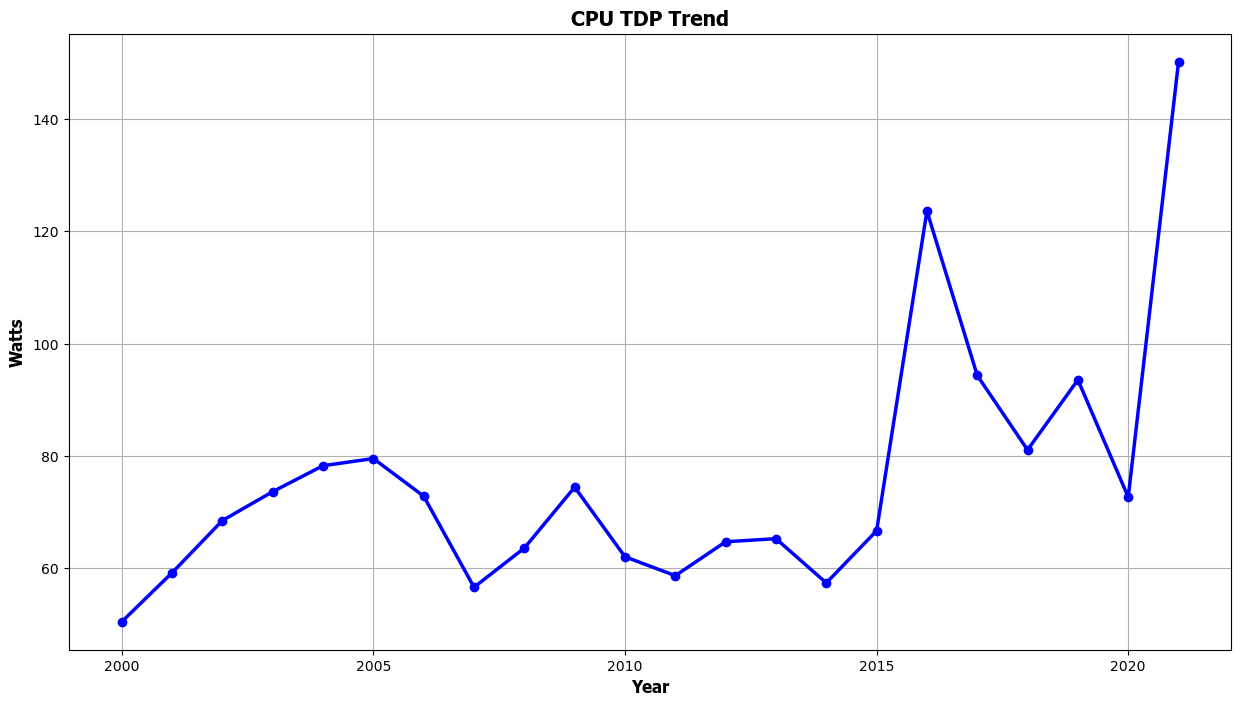

In [30]:
plt.figure(figsize=(15,8))
plt.plot(df_trend_cpu_TDP['Year'],df_trend_cpu_TDP['TDP'], color='BLUE', marker='o', linewidth=2.5)
plt.title('CPU TDP Trend',
          fontfamily='Tahoma',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Watts', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontfamily='Tahoma', fontweight='bold') 
plt.grid(axis='both', linestyle='-', alpha=1)

#### CPU Process Size Trend

In [31]:
df_trend_cpu_Process_Size = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_trend_cpu_Process_Size

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [32]:
df_trend_cpu_Process_Size['Date'] = pd.to_datetime(df_trend_cpu_Process_Size['Date'])
df_trend_cpu_Process_Size['Year'] = df_trend_cpu_Process_Size['Date'].dt.year
df_trend_cpu_Process_Size 

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [33]:
df_trend_cpu_Process_Size = df_trend_cpu_Process_Size.groupby('Year')['Process_Size'].mean().reset_index()
df_trend_cpu_Process_Size

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


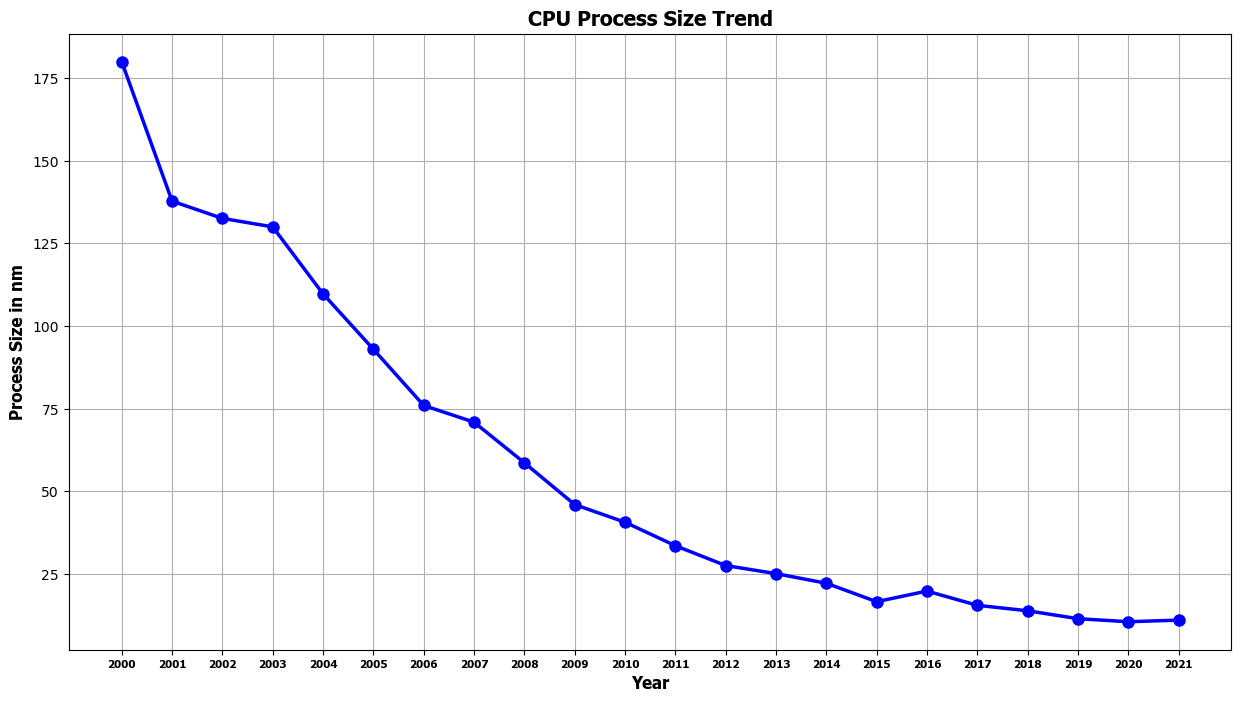

In [34]:
plt.figure(figsize=(15,8))
plt.plot(df_trend_cpu_Process_Size['Year'],df_trend_cpu_Process_Size['Process_Size'], color='BLUE', marker='o', linewidth=2.5, markersize=8)

plt.title('CPU Process Size Trend',
          fontfamily='Tahoma',
          fontsize=15,
          fontweight='bold')

plt.ylabel('Process Size in nm', fontsize=12, fontfamily='Tahoma', fontweight='bold')

plt.xticks(df_trend_cpu_Process_Size['Year'], fontsize=8, fontfamily='Tahoma',fontweight='bold')

plt.xlabel('Year', fontsize=12, fontfamily='Tahoma', fontweight='bold')

plt.grid(axis='both', linestyle='-', alpha=1)

plt.show()

#### CPU Die Size Trend

In [35]:
df_trend_cpu_Die_Size = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='CPU').dropna()
df_trend_cpu_Die_Size

,Type,Date,Die_Size
0,CPU,2/20/2007,77.000000
1,CPU,9/6/2018,192.000000
2,CPU,9/2/2020,188.440445
3,CPU,9/1/2013,160.000000
4,CPU,5/3/2011,258.000000
...,...,...,...
2187,CPU,4/6/2021,188.440445
2188,CPU,3/16/2020,156.000000
2189,CPU,7/1/2007,143.000000
2190,CPU,12/1/2004,188.440445


In [36]:
df_trend_cpu_Die_Size['Date'] = pd.to_datetime(df_trend_cpu_Die_Size['Date'])
df_trend_cpu_Die_Size['Year'] = df_trend_cpu_Die_Size['Date'].dt.year
df_trend_cpu_Die_Size 

,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,188.440445,2021.0
2188,CPU,2020-03-16,156.000000,2020.0
2189,CPU,2007-07-01,143.000000,2007.0
2190,CPU,2004-12-01,188.440445,2004.0


In [37]:
df_trend_cpu_Die_Size = df_trend_cpu_Die_Size.groupby('Year') ['Die_Size'].mean().reset_index()
df_trend_cpu_Die_Size

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


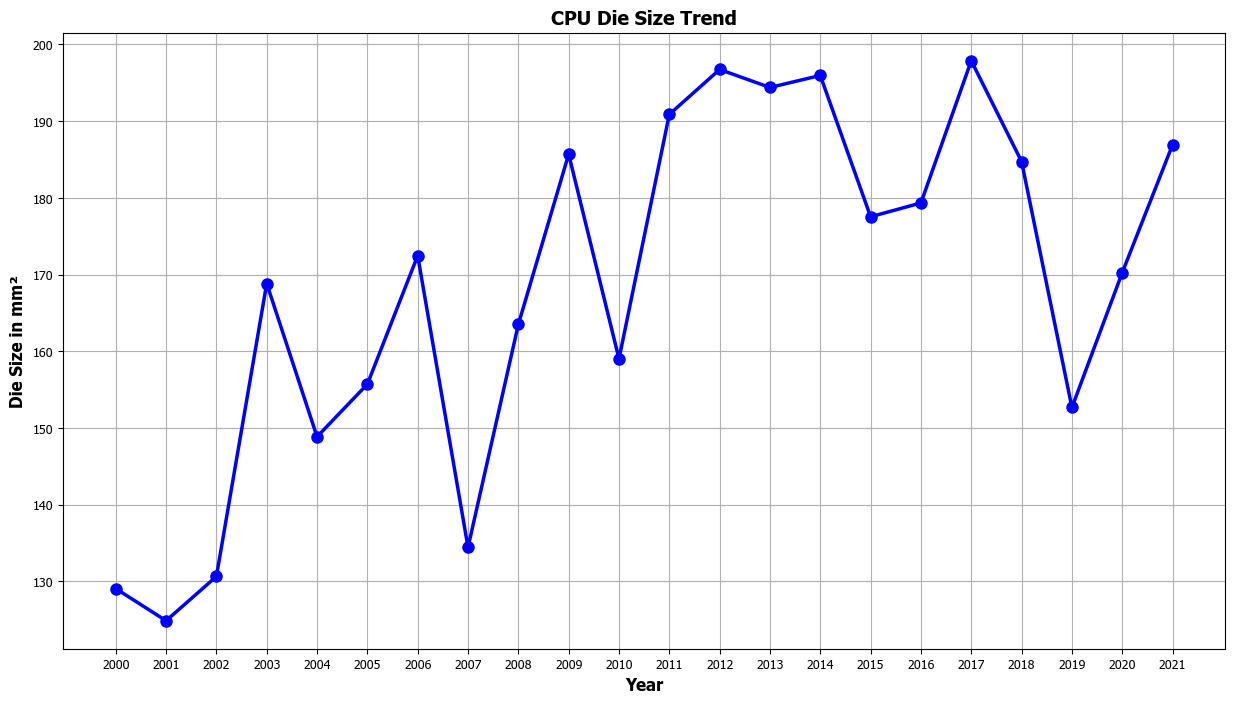

In [38]:
plt.figure(figsize=(15, 8))
plt.plot(df_trend_cpu_Die_Size['Year'], df_trend_cpu_Die_Size['Die_Size'], color='BLUE', marker='o', linestyle='-', linewidth=2.5, markersize=8)

plt.title('CPU Die Size Trend', fontsize=14, fontweight='bold', fontfamily='Tahoma')

plt.ylabel('Die Size in mm²', fontsize=12, fontfamily='Tahoma', fontweight='bold') 

plt.xlabel('Year', fontsize=12, fontfamily='Tahoma', fontweight='bold')

plt.xticks(df_trend_cpu_Die_Size['Year'], fontsize=9, fontfamily='Tahoma')

plt.yticks(fontsize=9, fontfamily='Tahoma')

plt.grid(axis='both', linestyle='-', alpha=1)

plt.show()

#### CPU Transistor Trend

In [39]:
df_trend_cpu_Transistor = df_w[['Type','Date','Transistors']].where(df_w['Type']=='CPU').dropna()
df_trend_cpu_Transistor

df_trend_cpu_Transistor['Date'] = pd.to_datetime(df_trend_cpu_Transistor['Date'])
df_trend_cpu_Transistor['Year'] = df_trend_cpu_Transistor['Date'].dt.year
df_trend_cpu_Transistor

,Type,Date,Transistors,Year
0,CPU,2007-02-20,122.000000,2007.0
1,CPU,2018-09-06,4800.000000,2018.0
2,CPU,2020-09-02,1929.922279,2020.0
3,CPU,2013-09-01,1400.000000,2013.0
4,CPU,2011-05-03,758.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,1929.922279,2021.0
2188,CPU,2020-03-16,9800.000000,2020.0
2189,CPU,2007-07-01,291.000000,2007.0
2190,CPU,2004-12-01,106.000000,2004.0


In [40]:
df_trend_cpu_Transistor = df_trend_cpu_Transistor.groupby('Year')['Transistors'].mean().reset_index()
df_trend_cpu_Transistor

,Year,Transistors
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


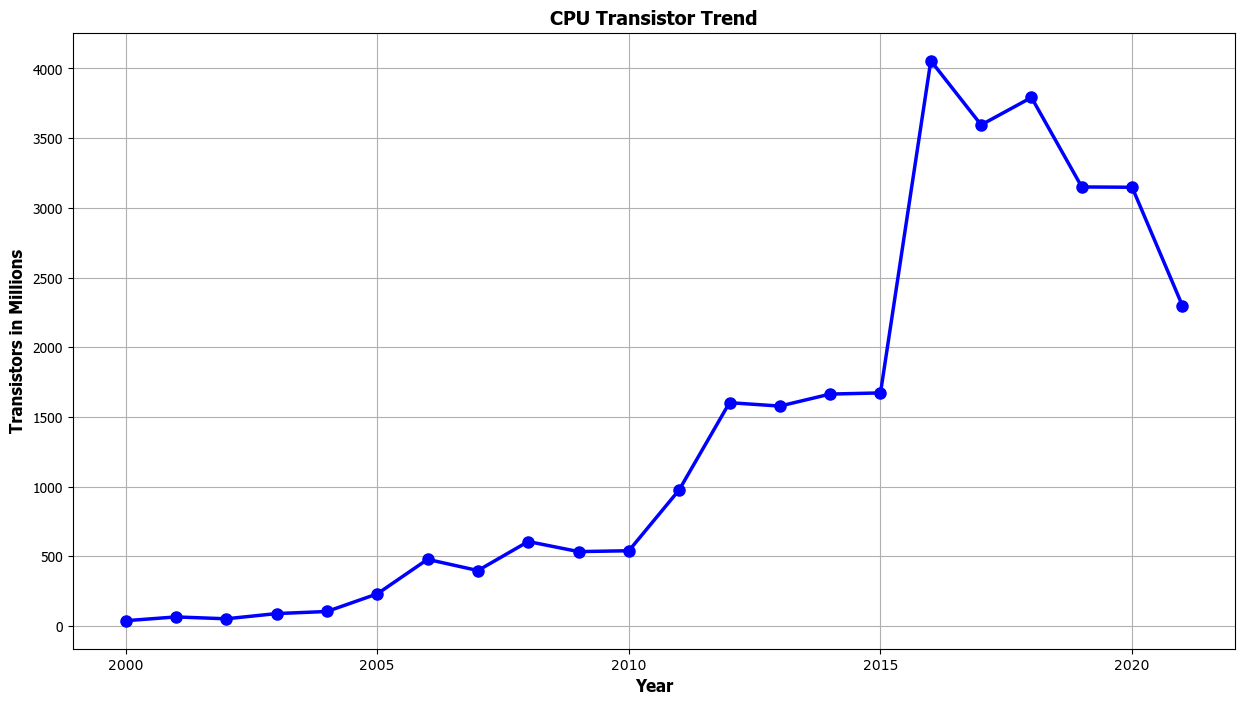

In [41]:
plt.figure(figsize=(15, 8))
plt.plot(df_trend_cpu_Transistor['Year'], df_trend_cpu_Transistor['Transistors'], color='BLUE', marker='o', linestyle='-', linewidth=2.5, markersize=8)

plt.title('CPU Transistor Trend', fontsize=14, fontweight='bold', fontfamily='Tahoma')

plt.ylabel('Transistors in Millions', fontsize=12, fontfamily='Tahoma', fontweight='bold') 

plt.xlabel('Year', fontsize=12, fontfamily='Tahoma', fontweight='bold')

plt.yticks(fontsize=10, fontfamily='Tahoma')

plt.grid(axis='both', linestyle='-', alpha=1)

plt.show()

#### CPU Frequency Trend

In [42]:
df_trend_cpu_Frequency = df_w[['Type','Date','Frequency']].where(df_w['Type']=='CPU').dropna()
df_trend_cpu_Frequency

,Type,Date,Frequency
0,CPU,2/20/2007,2200.0
1,CPU,9/6/2018,3200.0
2,CPU,9/2/2020,2600.0
3,CPU,9/1/2013,1800.0
4,CPU,5/3/2011,3700.0
...,...,...,...
2187,CPU,4/6/2021,2400.0
2188,CPU,3/16/2020,3300.0
2189,CPU,7/1/2007,2333.0
2190,CPU,12/1/2004,2000.0


In [43]:
df_trend_cpu_Frequency['Date'] = pd.to_datetime(df_trend_cpu_Frequency['Date'])
df_trend_cpu_Frequency['Year'] = df_trend_cpu_Frequency['Date'].dt.year
df_trend_cpu_Frequency


,Type,Date,Frequency,Year
0,CPU,2007-02-20,2200.0,2007.0
1,CPU,2018-09-06,3200.0,2018.0
2,CPU,2020-09-02,2600.0,2020.0
3,CPU,2013-09-01,1800.0,2013.0
4,CPU,2011-05-03,3700.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,2400.0,2021.0
2188,CPU,2020-03-16,3300.0,2020.0
2189,CPU,2007-07-01,2333.0,2007.0
2190,CPU,2004-12-01,2000.0,2004.0


In [44]:
df_trend_cpu_Frequency = df_trend_cpu_Frequency.groupby('Year')['Frequency'].mean().reset_index()
df_trend_cpu_Frequency

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


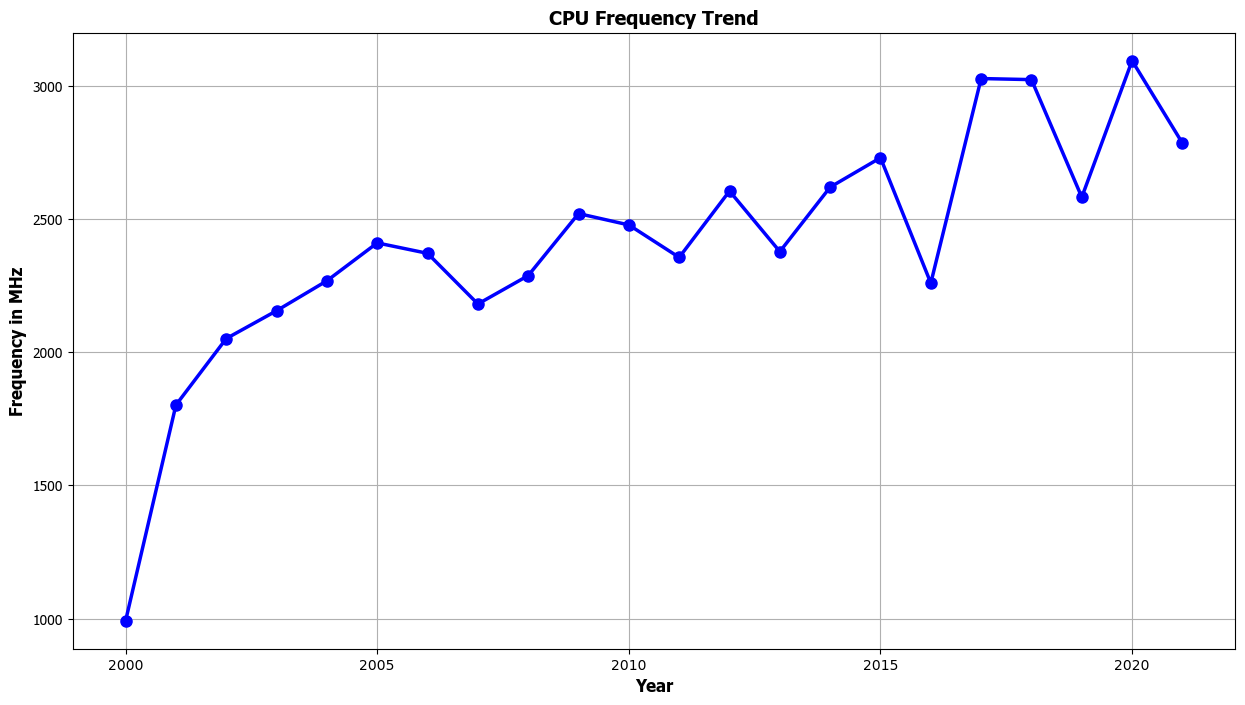

In [45]:
plt.figure(figsize=(15, 8))
plt.plot(df_trend_cpu_Frequency['Year'], df_trend_cpu_Frequency['Frequency'], color='BLUE', marker='o', linestyle='-', linewidth=2.5, markersize=8)

plt.title('CPU Frequency Trend', fontsize=14, fontweight='bold', fontfamily='Tahoma')

plt.ylabel('Frequency in MHz', fontsize=12, fontfamily='Tahoma', fontweight='bold') 

plt.xlabel('Year', fontsize=12, fontfamily='Tahoma', fontweight='bold')

plt.yticks(fontsize=10, fontfamily='Tahoma')

plt.grid(axis='both', linestyle='-', alpha=1)

plt.show()

### GPU Trends

#### GPU TDP Trend

In [46]:
df_trend_gpu_TDP = df_w[['Type','Date','TDP']].where(df_w['Type']=='GPU').dropna()
df_trend_gpu_TDP

df_trend_gpu_TDP['Date'] = pd.to_datetime(df_trend_gpu_TDP['Date'])
df_trend_gpu_TDP['Year'] = df_trend_gpu_TDP['Date'].dt.year
df_trend_gpu_TDP

df_trend_gpu_TDP = df_trend_gpu_TDP.groupby('Year')['TDP'].mean().reset_index()
df_trend_gpu_TDP

,Year,TDP
0,2000.0,55.258657
1,2001.0,65.297946
2,2002.0,75.419693
3,2003.0,69.121414
4,2004.0,68.908296
5,2005.0,75.262725
6,2006.0,63.032552
7,2007.0,69.652653
8,2008.0,95.534565
9,2009.0,73.114337


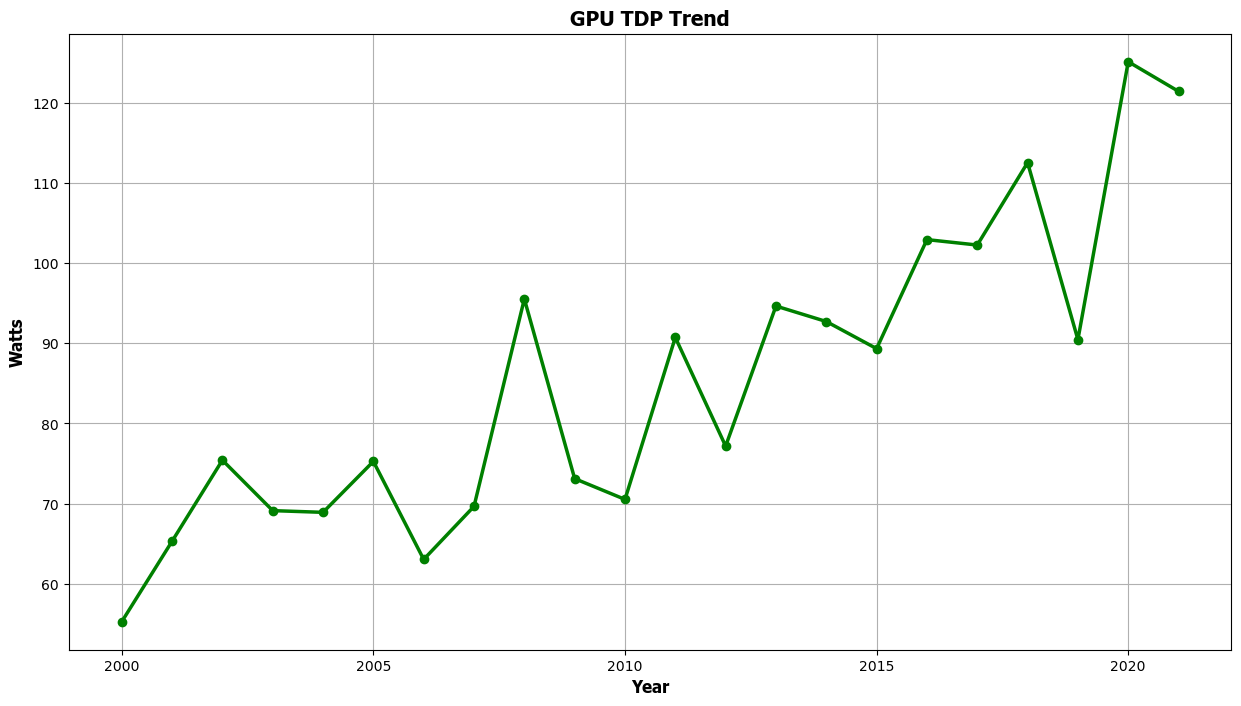

In [47]:
plt.figure(figsize=(15,8))
plt.plot(df_trend_gpu_TDP['Year'],df_trend_gpu_TDP['TDP'], color='GREEN', marker='o', linewidth=2.5)
plt.title('GPU TDP Trend',
          fontfamily='Tahoma',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Watts', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.grid(axis='both', linestyle='-', alpha=1)
plt.show()

#### GPU Process Size Trend

In [48]:
df_trend_gpu_Process_Size = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_trend_gpu_Process_Size

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [49]:
df_trend_gpu_Process_Size['Date'] = pd.to_datetime(df_trend_gpu_Process_Size['Date']) 
df_trend_gpu_Process_Size['Year'] = df_trend_gpu_Process_Size['Date'].dt.year
df_trend_gpu_Process_Size

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [50]:
df_trend_gpu_Process_Size = df_trend_gpu_Process_Size.groupby('Year')['Process_Size'].mean().reset_index()
df_trend_gpu_Process_Size

,Year,Process_Size
0,2000.0,189.642857
1,2001.0,165.000000
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.740385


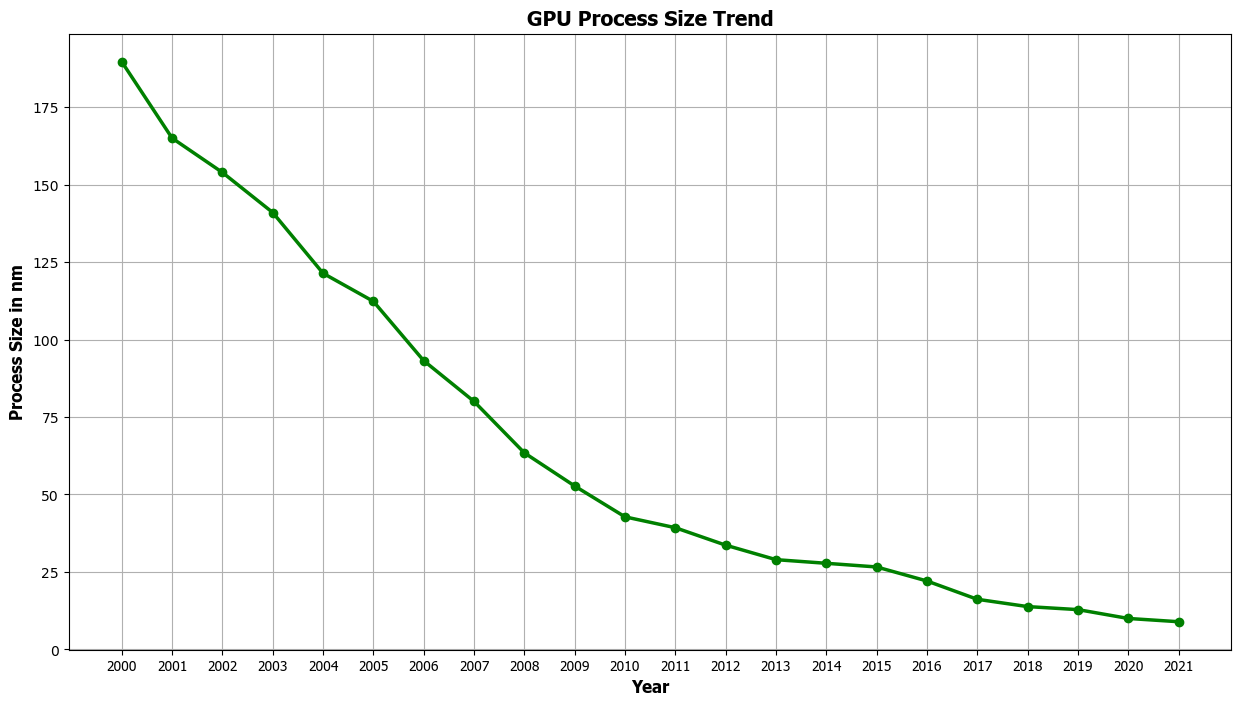

In [51]:
plt.figure(figsize=(15,8))
plt.plot(df_trend_gpu_Process_Size['Year'],df_trend_gpu_Process_Size['Process_Size'], color='GREEN', marker='o', linewidth=2.5)
plt.title('GPU Process Size Trend',
          fontfamily='Tahoma',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Process Size in nm', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xticks(df_trend_gpu_Process_Size['Year'], fontsize=10, fontfamily='Tahoma')
plt.grid(axis='both', linestyle='-', alpha=1)
plt.show()  

#### GPU Die Size Trend

In [52]:
df_trend_gpu_Die_Size = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_trend_gpu_Die_Size

,Type,Date,Die_Size
2192,GPU,4/3/2011,216.000000
2193,GPU,6/25/2002,174.000000
2194,GPU,2/23/2019,132.000000
2195,GPU,3/2/2008,188.440445
2196,GPU,9/30/2008,73.000000
...,...,...,...
4849,GPU,2/22/2011,332.000000
4850,GPU,6/1/2005,188.440445
4851,GPU,3/3/2010,100.000000
4852,GPU,3/6/2003,65.000000


In [53]:
df_trend_gpu_Die_Size['Date'] = pd.to_datetime(df_trend_gpu_Die_Size['Date'])
df_trend_gpu_Die_Size['Year'] = df_trend_gpu_Die_Size['Date'].dt.year   
df_trend_gpu_Die_Size

,Type,Date,Die_Size,Year
2192,GPU,2011-04-03,216.000000,2011.0
2193,GPU,2002-06-25,174.000000,2002.0
2194,GPU,2019-02-23,132.000000,2019.0
2195,GPU,2008-03-02,188.440445,2008.0
2196,GPU,2008-09-30,73.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [54]:
df_trend_gpu_Die_Size = df_trend_gpu_Die_Size.groupby('Year')['Die_Size'].mean().reset_index()
df_trend_gpu_Die_Size

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


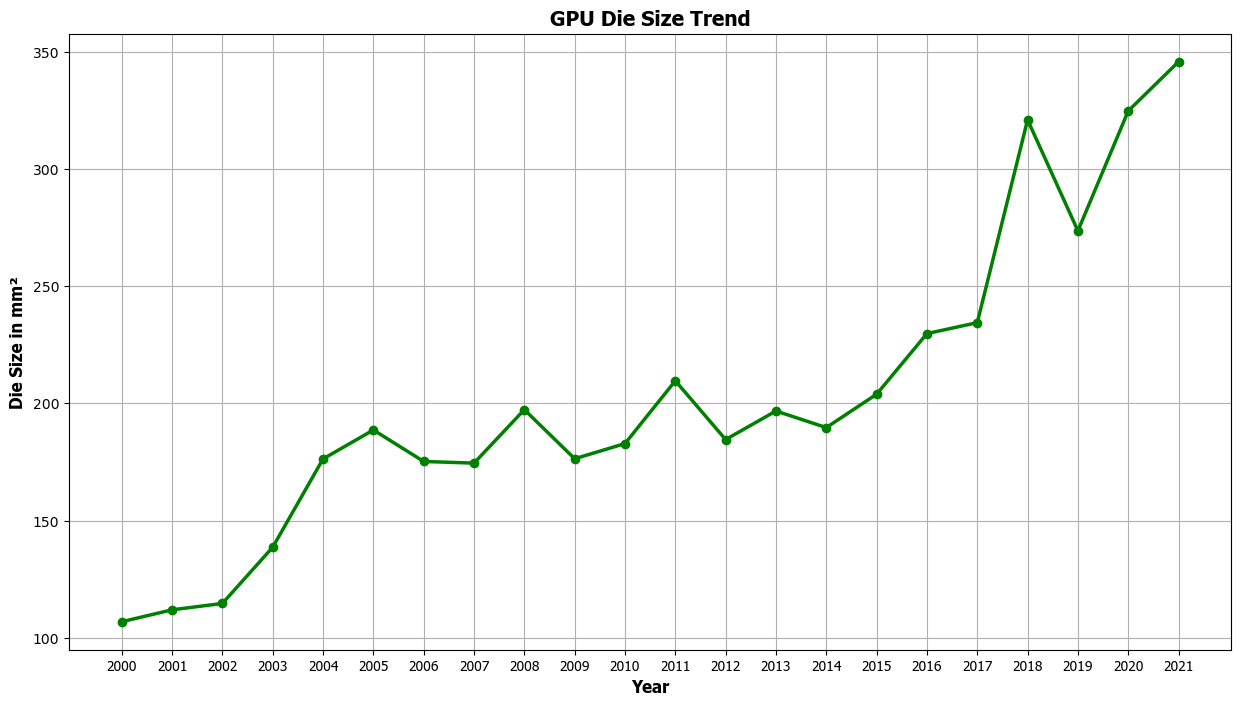

In [55]:
plt.figure(figsize=(15,8))
plt.plot(df_trend_gpu_Die_Size['Year'],df_trend_gpu_Die_Size['Die_Size'], color='GREEN', marker='o', linewidth=2.5)
plt.title('GPU Die Size Trend',
          fontfamily='Tahoma',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Die Size in mm²', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xticks(df_trend_gpu_Die_Size['Year'], fontsize=10, fontfamily='Tahoma')
plt.grid(axis='both', linestyle='-', alpha=1)
plt.show()

#### GPU Transistor Trend

In [56]:
df_trend_gpu_Transistor = df_w[['Type','Date','Transistors']].where(df_w['Type']=='GPU').dropna()
df_trend_gpu_Transistor

,Type,Date,Transistors
2192,GPU,4/3/2011,1160.000000
2193,GPU,6/25/2002,80.000000
2194,GPU,2/23/2019,3300.000000
2195,GPU,3/2/2008,1929.922279
2196,GPU,9/30/2008,242.000000
...,...,...,...
4849,GPU,2/22/2011,1950.000000
4850,GPU,6/1/2005,1929.922279
4851,GPU,3/3/2010,486.000000
4852,GPU,3/6/2003,29.000000


In [57]:
df_trend_gpu_Transistor['Date'] = pd.to_datetime(df_trend_gpu_Transistor['Date'])
df_trend_gpu_Transistor['Year'] = df_trend_gpu_Transistor['Date'].dt.year
df_trend_gpu_Transistor

,Type,Date,Transistors,Year
2192,GPU,2011-04-03,1160.000000,2011.0
2193,GPU,2002-06-25,80.000000,2002.0
2194,GPU,2019-02-23,3300.000000,2019.0
2195,GPU,2008-03-02,1929.922279,2008.0
2196,GPU,2008-09-30,242.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,2011.0
4850,GPU,2005-06-01,1929.922279,2005.0
4851,GPU,2010-03-03,486.000000,2010.0
4852,GPU,2003-03-06,29.000000,2003.0


In [58]:
df_trend_gpu_Transistor = df_trend_gpu_Transistor.groupby('Year')['Transistors'].mean().reset_index()
df_trend_gpu_Transistor


,Year,Transistors
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


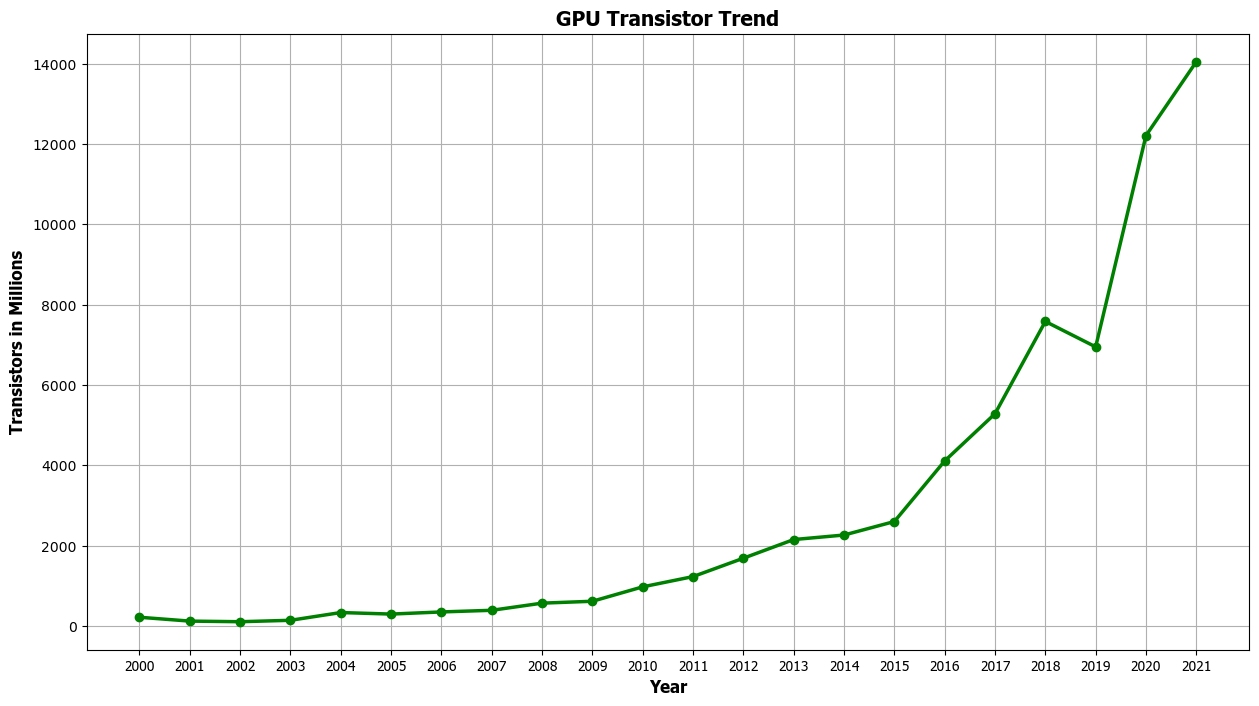

In [59]:
plt.figure(figsize=(15,8))
plt.plot(df_trend_gpu_Transistor['Year'],df_trend_gpu_Transistor['Transistors'], color='GREEN', marker='o', linewidth=2.5)
plt.title('GPU Transistor Trend',
          fontfamily='Tahoma',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Transistors in Millions', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xticks(df_trend_gpu_Transistor['Year'], fontsize=10, fontfamily='Tahoma')
plt.grid(axis='both', linestyle='-', alpha=1)
plt.show()


#### GPU Frequency Trend

In [60]:
df_trend_gpu_Frequency = df_w[['Type','Date','Frequency']].where(df_w['Type']=='GPU').dropna()
df_trend_gpu_Frequency

,Type,Date,Frequency
2192,GPU,4/3/2011,100.0
2193,GPU,6/25/2002,200.0
2194,GPU,2/23/2019,1469.0
2195,GPU,3/2/2008,200.0
2196,GPU,9/30/2008,600.0
...,...,...,...
4849,GPU,2/22/2011,450.0
4850,GPU,6/1/2005,250.0
4851,GPU,3/3/2010,500.0
4852,GPU,3/6/2003,250.0


In [61]:
df_trend_gpu_Frequency['Date'] = pd.to_datetime(df_trend_gpu_Frequency['Date'])
df_trend_gpu_Frequency['Year'] = df_trend_gpu_Frequency['Date'].dt.year
df_trend_gpu_Frequency

,Type,Date,Frequency,Year
2192,GPU,2011-04-03,100.0,2011.0
2193,GPU,2002-06-25,200.0,2002.0
2194,GPU,2019-02-23,1469.0,2019.0
2195,GPU,2008-03-02,200.0,2008.0
2196,GPU,2008-09-30,600.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,450.0,2011.0
4850,GPU,2005-06-01,250.0,2005.0
4851,GPU,2010-03-03,500.0,2010.0
4852,GPU,2003-03-06,250.0,2003.0


In [62]:
df_trend_gpu_Frequency = df_trend_gpu_Frequency.groupby('Year')['Frequency'].mean().reset_index()
df_trend_gpu_Frequency

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


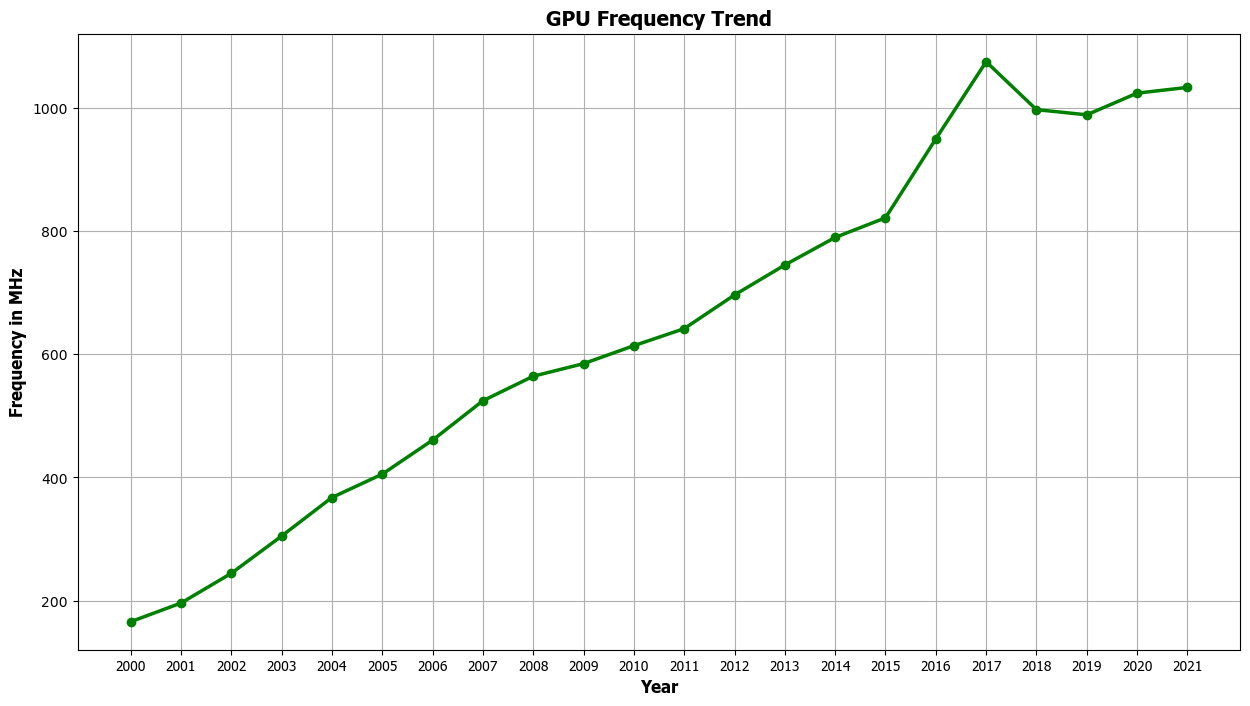

In [63]:
plt.figure(figsize=(15,8))
plt.plot(df_trend_gpu_Frequency['Year'],df_trend_gpu_Frequency['Frequency'], color='GREEN', marker='o', linewidth=2.5)
plt.title('GPU Frequency Trend',
          fontfamily='Tahoma',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Frequency in MHz', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xticks(df_trend_gpu_Frequency['Year'], fontsize=10, fontfamily='Tahoma')
plt.grid(axis='both', linestyle='-', alpha=1)
plt.show()

## Comparisons

### TDP Trends

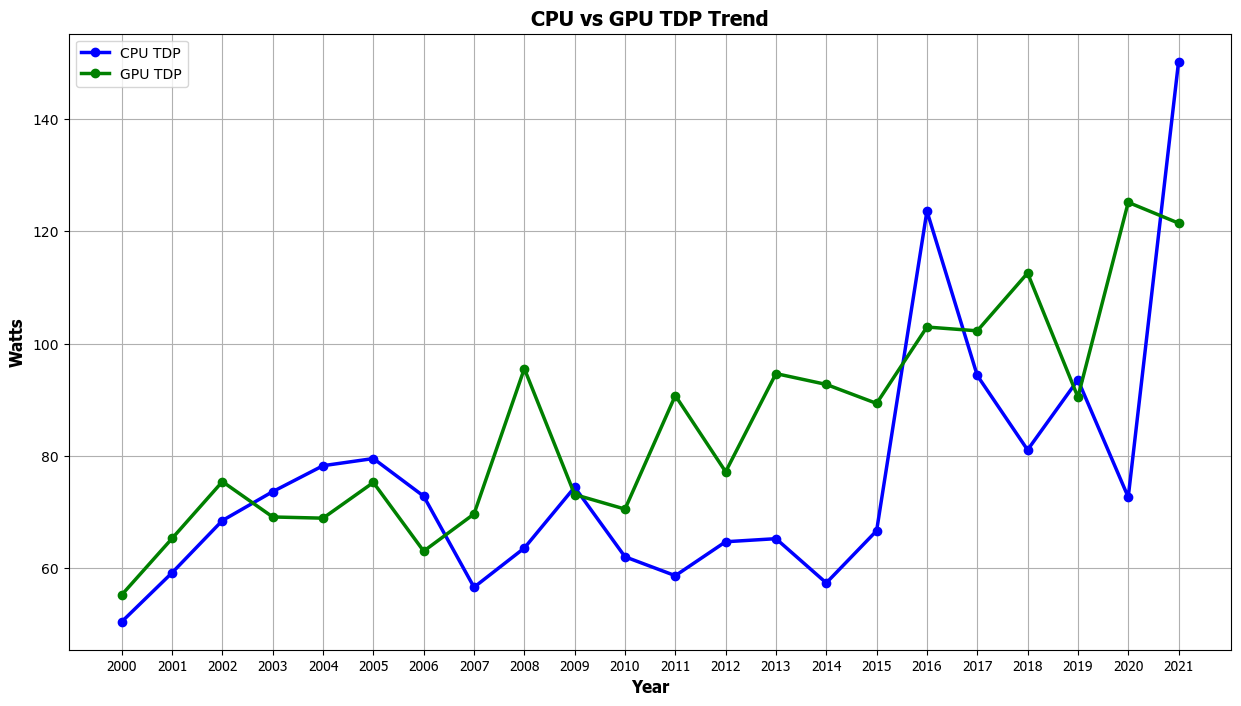

In [69]:
plt.figure(figsize=(15,8))
plt.plot(df_trend_cpu_TDP['Year'],df_trend_cpu_TDP['TDP'], color='BLUE', marker='o', linewidth=2.5, label='CPU TDP')
plt.plot(df_trend_gpu_TDP['Year'],df_trend_gpu_TDP['TDP'], color='GREEN', marker='o', linewidth=2.5, label='GPU TDP')
plt.title('CPU vs GPU TDP Trend',
          fontfamily='Tahoma',
          fontsize=15,
          fontweight='bold')
plt.ylabel('Watts', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xticks(df_trend_cpu_TDP['Year'], fontsize=10, fontfamily='Tahoma')
plt.grid(axis='both', linestyle='-', alpha=1)
plt.legend()
plt.show()

### Process Size Trends

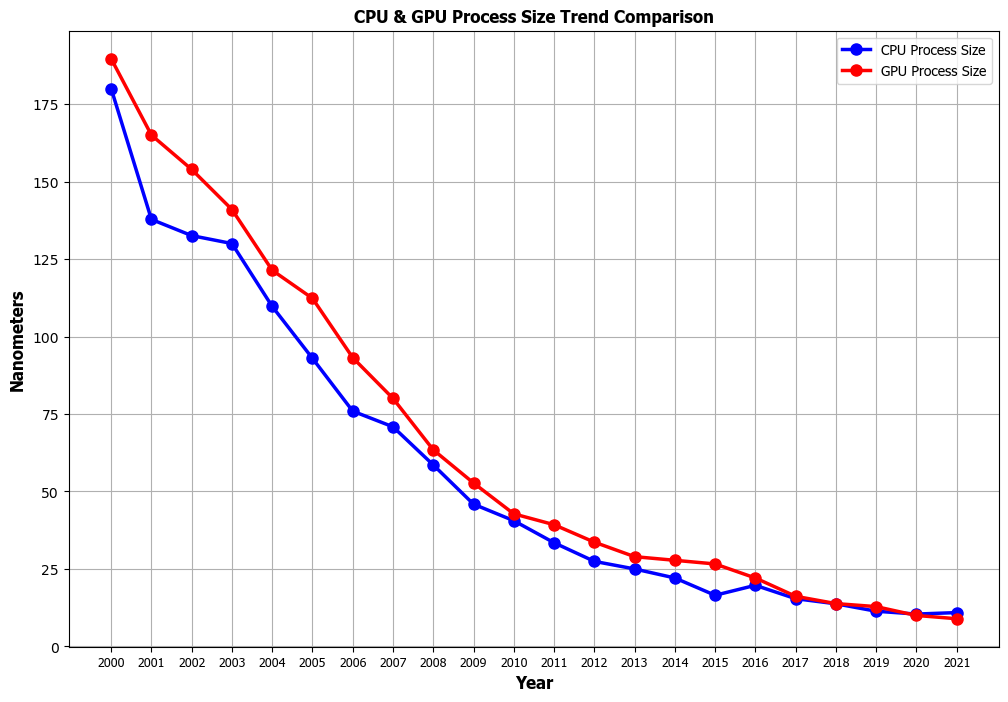

In [65]:
plt.figure(figsize=(12, 8)) 
plt.plot(df_trend_cpu_Process_Size['Year'], df_trend_cpu_Process_Size['Process_Size'], 
         color='BLUE', label='CPU Process Size', marker='o' , linewidth=2.5 , markersize=8) 

plt.plot(df_trend_gpu_Process_Size['Year'], df_trend_gpu_Process_Size['Process_Size'], 
         color='RED', label='GPU Process Size', marker='o' , linewidth=2.5 , markersize=8)

plt.title('CPU & GPU Process Size Trend Comparison',
          fontfamily='Tahoma',
          fontsize=12,
          fontweight='bold')

plt.ylabel('Nanometers', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xlabel('Year', fontfamily='Tahoma', fontsize=12, fontweight='bold')
plt.xticks(df_trend_cpu_Process_Size['Year'], fontsize=9, fontfamily='Tahoma')
plt.legend(loc='upper right', fontsize=10, prop={'family': 'Tahoma'}, facecolor='white')

plt.grid(axis='both', linestyle='-', alpha=1)

plt.show()


Conclusion: The Graph shows that over time, the **process sizes** of both GPUs and CPUs have **shrunk gradually**, implying that this trend of shrinking process sizes would lead to modern chips becoming more efficient through time. Furthermore, this downward trend predicts a steady decrease in transistor size and power consumption.

### Die Size Trends

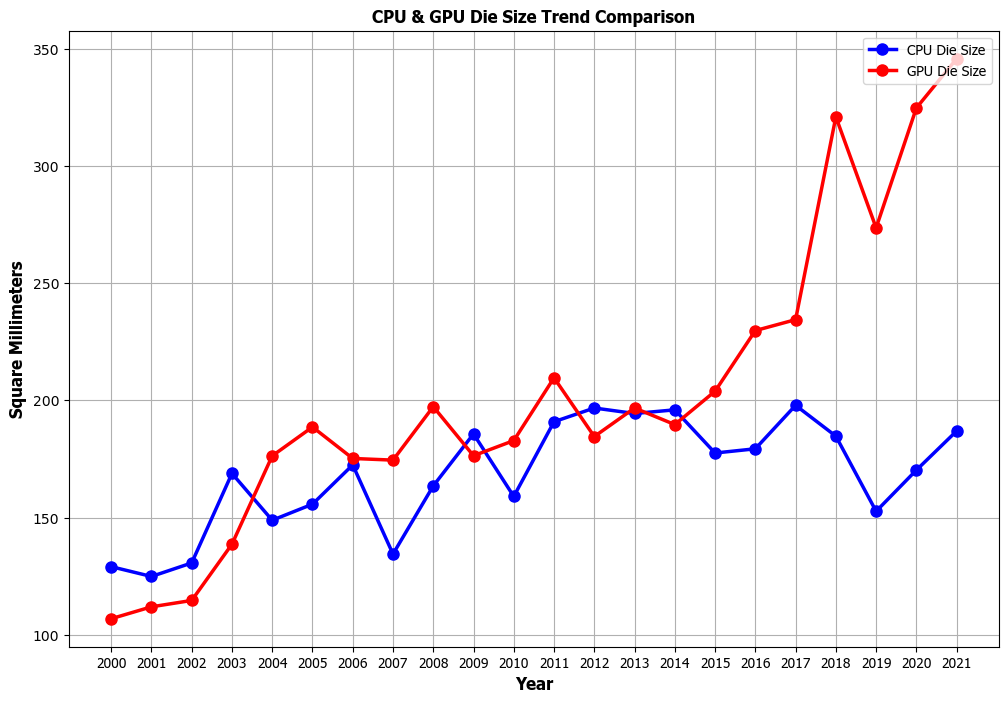

In [66]:
plt.figure(figsize=(12, 8))

plt.plot(df_trend_cpu_Die_Size['Year'], df_trend_cpu_Die_Size['Die_Size'], color='BLUE', label='CPU Die Size', marker='o' , linewidth=2.5 , markersize=8)

plt.plot(df_trend_gpu_Die_Size['Year'], df_trend_gpu_Die_Size['Die_Size'], color='RED', label='GPU Die Size', marker='o' , linewidth=2.5 , markersize=8)

plt.title('CPU & GPU Die Size Trend Comparison', fontfamily='Tahoma', fontsize=12, fontweight='bold')

plt.ylabel('Square Millimeters', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xlabel('Year', fontfamily='Tahoma', fontsize=12, fontweight='bold')
plt.xticks(df_trend_cpu_Die_Size['Year'], fontsize=10, fontfamily='Tahoma')
plt.legend(loc='upper right', fontsize=10, prop={'family': 'Tahoma'}, facecolor='white')

plt.grid(axis='both', linestyle='-', alpha=1)

plt.show()

Conclusion: 

The graph displayed shows that both CPU and GPU die sizes have gradually increased over time, relatively starting at only 100 Square millimeters. However, GPUs have a **more significant increase in Die Sizes** than CPUs espescially after the year *2015*. This would result in GPUs having a higher average *Die Size* in comparison to CPU Die Sizes but CPUs have a more stable trend compared to GPUs which has fluctuated even more after 2015.

GPU Die Sizes eventually exceed the range of **350 Square Millimeters**. This can be due to the advancement of technology, further increasing the power required and produced to complete more modern tasks such as larger data processing, modern Gaming, and utilizing AI. 

### Transistor Count Trends

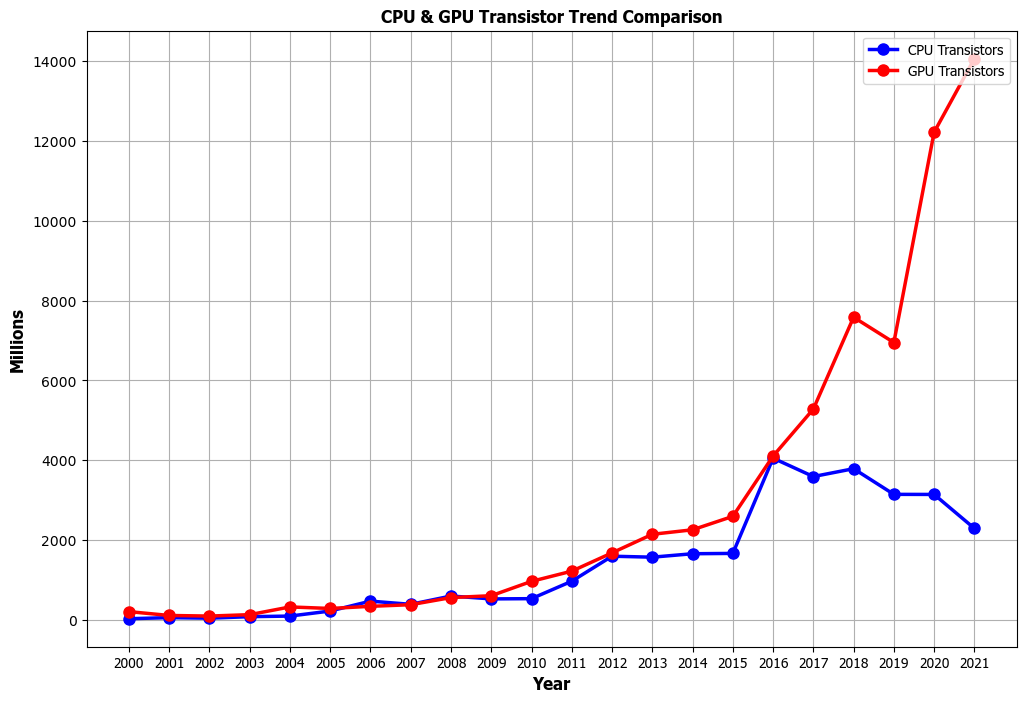

In [67]:
plt.figure(figsize=(12, 8))
plt.plot(df_trend_cpu_Transistor['Year'],df_trend_cpu_Transistor['Transistors'], color='BLUE', label='CPU Transistors', marker='o' , linewidth=2.5 , markersize=8)
plt.plot(df_trend_gpu_Transistor['Year'],df_trend_gpu_Transistor['Transistors'], color='RED', label='GPU Transistors', marker='o' , linewidth=2.5 , markersize=8)
plt.title('CPU & GPU Transistor Trend Comparison',
          fontfamily='Tahoma',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Millions', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xlabel('Year', fontfamily='Tahoma', fontsize=12, fontweight='bold')
plt.xticks(df_trend_cpu_Transistor['Year'], fontsize=10, fontfamily='Tahoma')
plt.legend(loc='upper right', fontsize=10, prop={'family': 'Tahoma'}, facecolor='white')
plt.grid(axis='both', linestyle='-', alpha=1)
plt.show()


Conclusion: 
The Graph shown higlights the significant growth in transistor counts for both CPUs and GPUs with GPUs showing a drastic increase in relative to CPUs. This could be due to the fact that GPUs now have a more critical role when it comes to needing more power and efficiency. Therefore, GPUs have been using a much more dense compactness in transistors in order to keep up with the requirements that GPUs are used for in modern times.

Additionally, CPU Transistor density has shown a decrease starting at the year 2017. This could imply that there has been a drastic shift in focus towards efficiency in needing transistors for CPUs rather than needing more raw applications.

Ultimately, the difference tells us that GPUs are becoming more dominant in computational power due to their role in handling much more complex workloads in performing modern tasks whereas CPUs remain essential for more common purposes. The significant increase in GPUs may indicate that the future may be more driven towards utilizing AI, machine leraning, and other high-performance computing application due to the heavier workloads nowadays.

### Frequency Trends

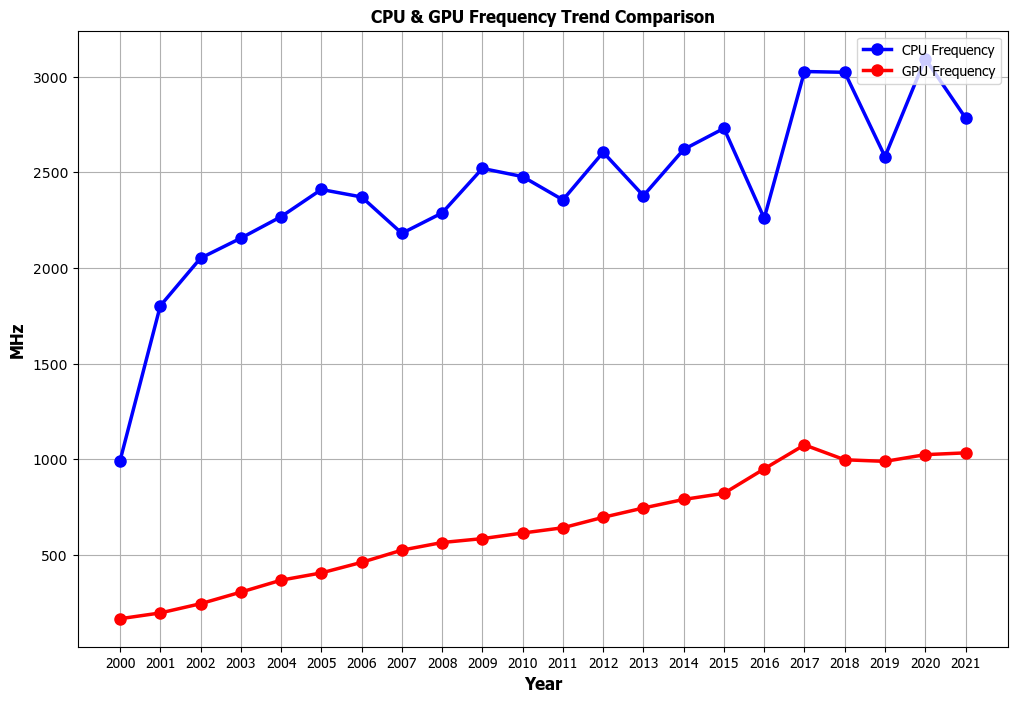

In [68]:
plt.figure(figsize=(12, 8))
plt.plot(df_trend_cpu_Frequency['Year'],df_trend_cpu_Frequency['Frequency'], color='BLUE', label='CPU Frequency', marker='o' , linewidth=2.5 , markersize=8)
plt.plot(df_trend_gpu_Frequency['Year'],df_trend_gpu_Frequency['Frequency'], color='RED', label='GPU Frequency', marker='o' , linewidth=2.5 , markersize=8)

plt.title('CPU & GPU Frequency Trend Comparison',
            fontfamily='Tahoma',
            fontsize=12,
            fontweight='bold')

plt.ylabel('MHz', fontsize=12, fontfamily='Tahoma', fontweight='bold')
plt.xlabel('Year', fontfamily='Tahoma', fontsize=12, fontweight='bold')
plt.xticks(df_trend_cpu_Frequency['Year'], fontsize=10, fontfamily='Tahoma')
plt.legend(loc='upper right', fontsize=10, prop={'family': 'Tahoma'}, facecolor='white')
plt.grid(axis='both', linestyle='-', alpha=1)
plt.show()

Conclusion:

The Graph illustrates rapid growth in CPU Frequencies throughout the years but eventually, growth has slown down after the year 2005. This would probably tell that something changed in manufacturing CPUs during this period where cost-effectiveness and efficiency were being prioritized as opposed to the traditional improvements made in CPUs. 

Meanwhile, GPU frequencies started in a significantly lower amount but has a rather steadier improvement while being relatively lower than CPU frequencies. Albeit slower, GPUs have improved drastically nonetheless given the modern tasks it is needed for.

Overall, The Graph displays that CPU development has been fluctuating when it comes to prioritizing certain factors in manufacturing whilst the gradual improvement of GPUs shows that its steady evolution over time aligns with modern standards resulting in requiring more power from GPUs.

## Overall Conclusion

Overall, this analysis highlights a fundamental shift in computing. CPUs have moved toward efficiency, multi-core designs, and architectural refinements, while GPUs have taken the lead in transistor growth, die size expansion, and high-performance parallel computing. As workloads evolve especially with AI, deep learning, and gaming—the reliance on GPUs will continue to grow. CPUs will remain essential for general-purpose tasks, but the trend suggests that GPUs are becoming the driving force behind modern computing advancements.